In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [ ]:
df=pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


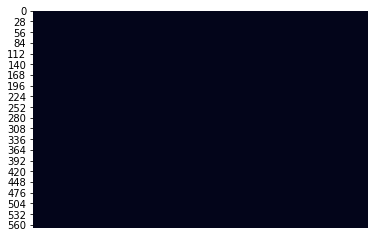

In [ ]:
sns.heatmap(df.isnull(),xticklabels=False,cbar=False)

In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

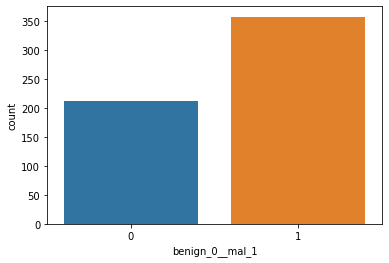

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

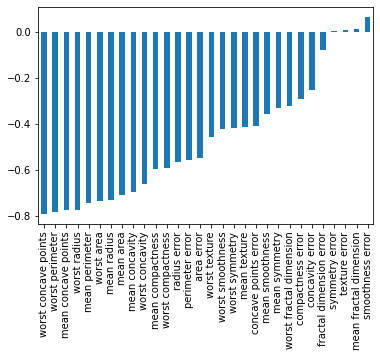

In [ ]:
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

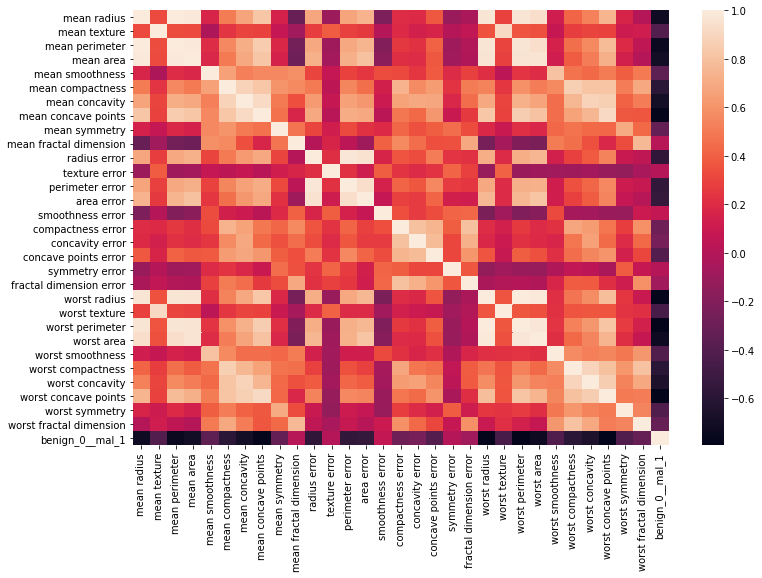

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [ ]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
x_train.shape

(426, 30)

In [ ]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x_train,y_train,epochs=600,validation_data=(x_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6271 - val_loss: 0.6082
Epoch 2/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5877 - val_loss: 0.5631
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5355 - val_loss: 0.5091
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4879 - val_loss: 0.4599
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4412 - val_loss: 0.4139
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3993 - val_loss: 0.3689
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3574 - val_loss: 0.3297
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3207 - val_loss: 0.2927
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2894 - val_loss: 0.2642
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2640 - val_loss: 0.2350
Epoch 1

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.627116,0.608180
1,0.587749,0.563064
2,0.535471,0.509119
3,0.487933,0.459853
4,0.441152,0.413883


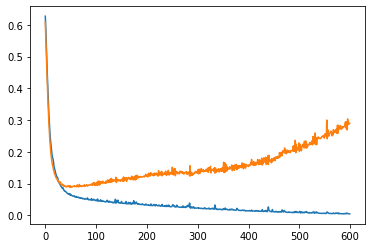

In [ ]:
plt.plot(losses)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x_train,y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6823 - val_loss: 0.6586
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6530 - val_loss: 0.6245
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6209 - val_loss: 0.5839
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5718 - val_loss: 0.5340
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5201 - val_loss: 0.4754
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4663 - val_loss: 0.4160
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3995 - val_loss: 0.3655
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3559 - val_loss: 0.3206
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3147 - val_loss: 0.2840
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2955 - val_loss: 0.2588
Epoch 11

In [ ]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,val_loss
0,0.678145,0.658641
1,0.645998,0.624479
2,0.607620,0.583904
3,0.564432,0.533955
4,0.507515,0.475387


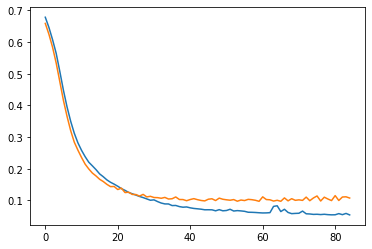

In [ ]:
plt.plot(loss)

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x_train,y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7268 - val_loss: 0.6888
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7131 - val_loss: 0.6745
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6929 - val_loss: 0.6603
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6754 - val_loss: 0.6441
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6487 - val_loss: 0.6223
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6406 - val_loss: 0.5880
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5801 - val_loss: 0.5563
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5899 - val_loss: 0.5305
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5424 - val_loss: 0.5026
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5383 - val_loss: 0.4782
Epoch 11

In [ ]:
model_loss=pd.DataFrame(model.history.history)
model_loss.head()

,loss,val_loss
0,0.723353,0.688762
1,0.705734,0.674483
2,0.680997,0.660325
3,0.673760,0.644108
4,0.649924,0.622277


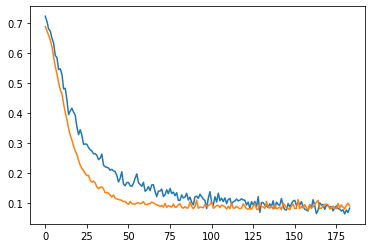

In [ ]:
plt.plot(model_loss)

In [ ]:
prediction=model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
print(confusion_matrix(y_test,prediction))

[[54  1]
 [ 2 86]]
